<a href="https://colab.research.google.com/github/luizleroy/treinamentos/blob/develop/clustering/hierarchicalCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np

base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [3]:
scaler = StandardScaler()
transform = scaler.fit_transform(base)
transform

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [4]:
link = linkage(transform, method = 'ward')
link

array([[10.        , 11.        ,  0.51848966,  2.        ],
       [ 5.        ,  6.        ,  0.54118679,  2.        ],
       [ 4.        ,  7.        ,  0.58859269,  2.        ],
       [ 0.        ,  1.        ,  0.65430107,  2.        ],
       [13.        , 14.        ,  0.72661025,  2.        ],
       [ 9.        , 12.        ,  0.83824243,  2.        ],
       [ 8.        , 16.        ,  0.87930988,  3.        ],
       [ 3.        , 17.        ,  1.03277339,  3.        ],
       [ 2.        , 18.        ,  1.04158507,  3.        ],
       [15.        , 19.        ,  1.30937334,  4.        ],
       [21.        , 22.        ,  1.63041645,  6.        ],
       [20.        , 24.        ,  1.63205962,  6.        ],
       [23.        , 25.        ,  4.74630659,  9.        ],
       [26.        , 27.        ,  4.99446232, 15.        ]])

Text(0, 0.5, 'Distância Euclidiana Transformada')

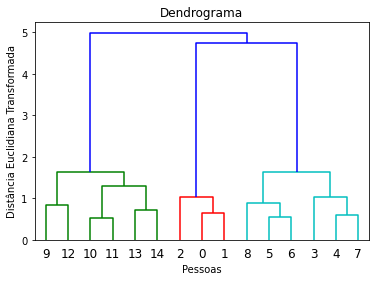

In [5]:
dendrograma = dendrogram(link)
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana ''Transformada''')

In [6]:
base

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [7]:
#hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc = AgglomerativeClustering(linkage = 'ward')
previsoes = hc.fit_predict(base)
previsoes


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

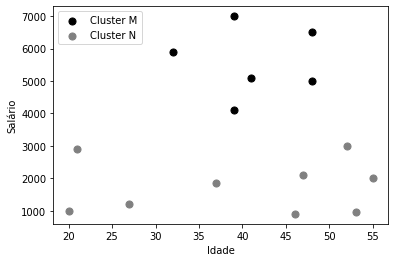

In [9]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'black', label = 'Cluster M')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'gray', label = 'Cluster N')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()